In [1]:
import sys
path = '/Users/apple/desktop/Yangze_Investment/Task8_Reproduce_Report/Task8_20200304_2022'
sys.path.append(f'{path}/self_defined')

In [2]:
from calc_inv_data import calc_inv_data
from process_total_inv import process_total_inv
from generate_inv_signal_seprank import generate_inv_signal_seprank
from generate_inv_signal_unirank import generate_inv_signal_unirank
from generate_inv_signal_allinone import generate_inv_signal_allinone
from generate_ret_fnv import generate_ret_fnv

In [6]:
%%time

# import sys
# import math
# # import xlwings
# import numpy as np
import pandas as pd
from yzutil import YzDataClient


# initiate data api obj
yz = YzDataClient('bruce@yangzeinvest.com', 'bruce123')

# load data
inv_index_tb = pd.read_csv(f'{path}/data/inventory_data_index.csv')
futures_data_df = pd.read_csv(f'{path}/data/futures_data.csv', index_col=0)

# set parameters
SIG_THRESHOLD = 0.2

mode = 'ret_annualized_pair'

shift_inv, shift_sig = 'shift_yes', 'shift_yes'

# rolling_list = [5]
rolling_list = [5] + [i for i in range(10, 110, 10)]

annualized_ret_df = pd.DataFrame()

# main function calls
inv_total_tradingday_df = process_total_inv(inv_index_tb, yz, shift_inv)

for rolling in rolling_list:
    
    # main function call
    signal_df = generate_inv_signal_unirank(inv_total_tradingday_df, rolling, SIG_THRESHOLD)
    
    annualized_ret_pair = generate_ret_fnv(inv_index_tb, futures_data_df, signal_df, shift_sig, mode, '2017-07-31')
    
    annualized_ret_pair_df = pd.DataFrame(annualized_ret_pair)
    
    annualized_ret_df = pd.concat([annualized_ret_df, annualized_ret_pair_df], axis=1)
    
annualized_ret_df.index = ['annualized_ret', 'annualized_ret_DeductTC']
annualized_ret_df.columns = rolling_list

annualized_ret_df

Login YzData Success
CPU times: user 2min 46s, sys: 780 ms, total: 2min 47s
Wall time: 3min 10s


,5,10,20,30,40,50,60,70,80,90,100
annualized_ret,0.0403,0.0515,0.0242,0.0022,0.0382,0.0263,0.0261,0.0247,0.0468,0.0541,0.0386
annualized_ret_DeductTC,-0.0000,0.0284,0.0098,-0.0087,0.0286,0.0178,0.0180,0.0177,0.0402,0.0478,0.0328


In [7]:
annualized_ret_df.to_csv(f'{path}/results/annualized_ret_UniRank_20170731_R5to100_df.csv')

In [3]:
%%time

# import sys
# import math
# # import xlwings
# import numpy as np
import pandas as pd
from yzutil import YzDataClient


# initiate data api obj
yz = YzDataClient('bruce@yangzeinvest.com', 'bruce123')

# load data
inv_index_tb = pd.read_csv(f'{path}/data/inventory_data_index.csv')
futures_data_df = pd.read_csv(f'{path}/data/futures_data.csv', index_col=0)

# set parameters
SIG_THRESHOLD = 0.2

mode = 'ret_annualized_pair'

shift_inv, shift_sig = 'shift_yes', 'shift_yes'

rolling_list = [i for i in range(10, 110, 10)]

annualized_ret_df = pd.DataFrame()

# main function calls
inv_total_tradingday_df = process_total_inv(inv_index_tb, yz, shift_inv)

for rolling in rolling_list:
    
    # main function call
    signal_df = generate_inv_signal_unirank(inv_total_tradingday_df, rolling, SIG_THRESHOLD)
    
    annualized_ret_pair = generate_ret_fnv(inv_index_tb, futures_data_df, signal_df, shift_sig, mode, '2017-07-31')
    
    annualized_ret_pair_df = pd.DataFrame(annualized_ret_pair)
    
    annualized_ret_df = pd.concat([annualized_ret_df, annualized_ret_pair_df], axis=1)
    
annualized_ret_df.index = ['annualized_ret', 'annualized_ret_DeductTC']
annualized_ret_df.columns = rolling_list

annualized_ret_df

Login YzData Success
CPU times: user 2min 33s, sys: 811 ms, total: 2min 33s
Wall time: 3min 3s


,10,20,30,40,50,60,70,80,90,100
annualized_ret,0.0463,0.0195,-0.0005,0.0205,0.0173,0.0252,0.0288,0.0404,0.0532,0.0341
annualized_ret_DeductTC,0.0237,0.0052,-0.0114,0.0111,0.0089,0.0170,0.0215,0.0339,0.0471,0.0283


In [3]:
%%time

# import sys
# import math
# # import xlwings
# import numpy as np
import pandas as pd
from yzutil import YzDataClient


# initiate data api obj
yz = YzDataClient('bruce@yangzeinvest.com', 'bruce123')

# load data
inv_index_tb = pd.read_csv(f'{path}/data/inventory_data_index.csv')
futures_data_df = pd.read_csv(f'{path}/data/futures_data.csv', index_col=0)

# set parameters
SIG_THRESHOLD = 0.2

mode = 'ret_annualized_pair'

shift_inv, shift_sig = 'shift_yes', 'shift_yes'

rolling_list = [i for i in range(10, 110, 10)]

annualized_ret_df = pd.DataFrame()

# main function calls
inv_total_tradingday_df = process_total_inv(inv_index_tb, yz, shift_inv)

for rolling in rolling_list:
    
    # main function call
    signal_df = generate_inv_signal_unirank(inv_total_tradingday_df, rolling, SIG_THRESHOLD)
    
    annualized_ret_pair = generate_ret_fnv(inv_index_tb, futures_data_df, signal_df, shift_sig, mode, '2017-07-31')
    
    annualized_ret_pair_df = pd.DataFrame(annualized_ret_pair)
    
    annualized_ret_df = pd.concat([annualized_ret_df, annualized_ret_pair_df], axis=1)
    
annualized_ret_df.index = ['annualized_ret', 'annualized_ret_DeductTC']
annualized_ret_df.columns = rolling_list

annualized_ret_df

Login YzData Success
CPU times: user 2min 34s, sys: 801 ms, total: 2min 35s
Wall time: 2min 52s


,10,20,30,40,50,60,70,80,90,100
annualized_ret,0.0437,0.0184,-0.0004,0.0194,0.0164,0.0238,0.0272,0.0381,0.0502,0.0322
annualized_ret_DeductTC,0.0224,0.0049,-0.0108,0.0105,0.0084,0.0160,0.0203,0.0320,0.0445,0.0267


In [9]:
annualized_ret_df.to_csv(f'{path}/results/annualized_ret_UniRank_20170731_df.csv')

In [5]:
%%time

# initiate data api obj
yz = YzDataClient('bruce@yangzeinvest.com', 'bruce123')

# load data
inv_index_tb = pd.read_csv(f'{path}/data/inventory_data_index.csv')
futures_data_df = pd.read_csv(f'{path}/data/futures_data.csv', index_col=0)

# set parameters
SIG_THRESHOLD = 0.2

mode = 'ret_cumulative_pair'

shift_inv, shift_sig = 'shift_yes', 'shift_yes'

rolling_list = [i for i in range(10, 110, 10)]

cumulative_ret_2017_df = pd.DataFrame()

# main function calls
inv_total_tradingday_df = process_total_inv(inv_index_tb, yz, shift_inv)

for rolling in rolling_list:
    
    # main function call
    signal_df = generate_inv_signal_unirank(inv_total_tradingday_df, rolling, SIG_THRESHOLD)
    
    cumulative_ret_pair_2017 = generate_ret_fnv(inv_index_tb, futures_data_df, signal_df, shift_sig, mode, '2017-07-31')
    
    cumulative_ret_pair_2017_df = pd.DataFrame(cumulative_ret_pair_2017)
    
    cumulative_ret_2017_df = pd.concat([cumulative_ret_2017_df, cumulative_ret_pair_2017_df], axis=1)
    
cumulative_ret_2017_df.index = ['cumulative_ret', 'cumulative_ret_DeductTC']
cumulative_ret_2017_df.columns = rolling_list

cumulative_ret_2017_df

Login YzData Success
CPU times: user 2min 38s, sys: 940 ms, total: 2min 39s
Wall time: 2min 56s


,10,20,30,40,50,60,70,80,90,100
cumulative_ret,0.0021,-0.0076,0.1150,0.1730,0.1122,0.0399,0.0418,0.0567,-0.0060,-0.0135
cumulative_ret_DeductTC,-0.0091,-0.0148,0.1085,0.1668,0.1062,0.0351,0.0366,0.0513,-0.0108,-0.0180


In [6]:
cumulative_ret_2017_df.to_csv(f'{path}/results/cumulative_ret_2017_UniRank_df.csv')

In [10]:
%%time

# initiate data api obj
yz = YzDataClient('bruce@yangzeinvest.com', 'bruce123')

# load data
inv_index_tb = pd.read_csv(f'{path}/data/inventory_data_index.csv')
futures_data_df = pd.read_csv(f'{path}/data/futures_data.csv', index_col=0)

# set parameters
SIG_THRESHOLD = 0.2

mode = 'ret_portfolio_df'

shift_inv, shift_sig = 'shift_yes', 'shift_yes'

rolling_list = [100]

annualized_ret_df = pd.DataFrame()

# main function calls
inv_total_tradingday_df = process_total_inv(inv_index_tb, yz, shift_inv)

for rolling in rolling_list:
    
    # main function call
    signal_df = generate_inv_signal_unirank(inv_total_tradingday_df, rolling, SIG_THRESHOLD)
    
    portfolio_dailyret_df = generate_ret_fnv(inv_index_tb, futures_data_df, signal_df, shift_sig, mode, '2017-07-31')

portfolio_dailyret_df

Login YzData Success
CPU times: user 19.9 s, sys: 172 ms, total: 20.1 s
Wall time: 40.5 s


,daily_ret_portfolio,ret_plus1,transaction_cost,ret_plus1_DeductTC,fund_net_value,fund_net_value_DeductTC
timestamp,,,,,,
2010-01-06,0.000000,1.000000,-0.000000,1.000000,1.000000,1.000000
2010-01-07,0.000000,1.000000,-0.000000,1.000000,1.000000,1.000000
2010-01-08,0.000000,1.000000,-0.000000,1.000000,1.000000,1.000000
2010-01-11,0.000000,1.000000,-0.000000,1.000000,1.000000,1.000000
2010-01-12,0.000000,1.000000,-0.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
2017-07-25,-0.000640,0.999360,-0.000225,0.999135,1.293131,1.239113
2017-07-26,-0.004907,0.995093,-0.000000,0.995093,1.286785,1.233032
2017-07-27,-0.001839,0.998161,-0.000000,0.998161,1.284419,1.230765


In [11]:
portfolio_dailyret_df.to_csv(f'{path}/results/portfolio_dailyret_unirank_20170731_R{rolling}_df.csv')

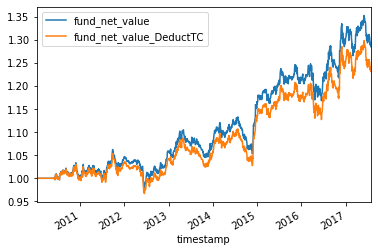

In [12]:
portfolio_dailyret_df[['fund_net_value', 'fund_net_value_DeductTC']].plot()

In [11]:
[1,3,5] + [i for i in range(10, 30, 10)]

[1, 3, 5, 10, 20]